# Prediction using Unsupervised ML


In [1]:
# for data
import pandas as pd
import numpy as np

# for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# for statistical test
import scipy
import statsmodels.formula.api as smf
import statsmodels.api as sm

# for machine learning
from sklearn import model_selection, preprocessing, feature_selection, ensemble, metrics, decomposition

To read data into a pandas DataFrame, and observe the feature of dataset.

In [2]:
df = pd.read_csv("Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## Basic Statistical Analysis
Determining the mean and median of the different species present in the data set

In [3]:
dtf = df.set_index('Id')
dtf.head()
dtf.groupby('Species').agg(['mean', 'median'])

SepalLengthCm        SepalWidthCm        PetalLengthCm         \
                         mean median         mean median          mean median   
Species                                                                         
Iris-setosa             5.006    5.0        3.418    3.4         1.464   1.50   
Iris-versicolor         5.936    5.9        2.770    2.8         4.260   4.35   
Iris-virginica          6.588    6.5        2.974    3.0         5.552   5.55   

                PetalWidthCm         
                        mean median  
Species                              
Iris-setosa            0.244    0.2  
Iris-versicolor        1.326    1.3  
Iris-virginica         2.026    2.0

## Label Encoding

In [4]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])
df['Species'].value_counts()

2    50
1    50
0    50
Name: Species, dtype: int64

In [5]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


## Data Analysis
The exploratory data analysis is to summarize the main characteristics of a dataset to understand what the data can tell beyond the formal modeling or hypothesis testing task.

In [6]:
"Recognize whether a column is numerical or categorical"

def utils_recognize_type(df, col, max_cat=20):
    if (df[col].dtypes == int) | (df[col].nunique() < max_cat):
        return 'cat'
    else:
        return 'num'

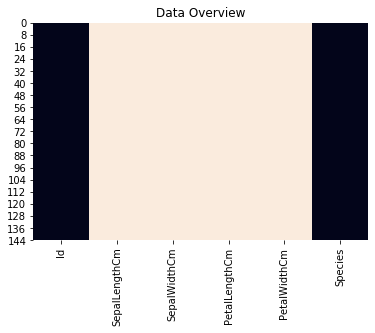

 Categoricial  Numeric  Nan


In [7]:
dic_cols = {col:utils_recognize_type(df, col, max_cat=20) for col in df.columns}

heatmap = df.isnull()
for k, v in dic_cols.items():
    if v == 'num':
        heatmap[k] = heatmap[k].apply(lambda x: 0.5 if x is False else 1)
    else:
        heatmap[k] = heatmap[k].apply(lambda x: 0 if x is False else 1)
        
sns.heatmap(heatmap, cbar=False).set_title('Data Overview')
plt.show()

print('\033[1;37;40m Categoricial', '\033[1;30;41m Numeric', '\033[1;30;47m Nan')

## Box-plots using Seaborn library
Box plot, also known as a box and whisker plot, displays a summary of a large amount of data in five numbers — minimum, lower quartile(25th percentile), median(50th percentile), upper quartile(75th percentile) and maximum data values.

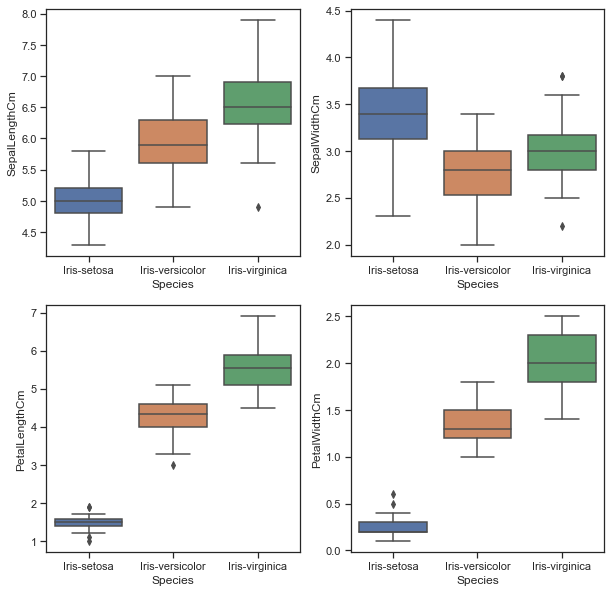

In [8]:
sns.set(style='ticks')
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
sns.boxplot(x='Species', y='SepalLengthCm', data=dtf)
plt.subplot(2, 2, 2)
sns.boxplot(x='Species', y='SepalWidthCm', data=dtf)
plt.subplot(2, 2, 3)
sns.boxplot(x='Species', y='PetalLengthCm', data=dtf)
plt.subplot(2, 2, 4)
sns.boxplot(x='Species', y='PetalWidthCm', data=dtf)
plt.show()

## Violin Plots
The plot components correspond to actual data points, the violin plot additionally shows the kernel density estimation of the underlying distribution.

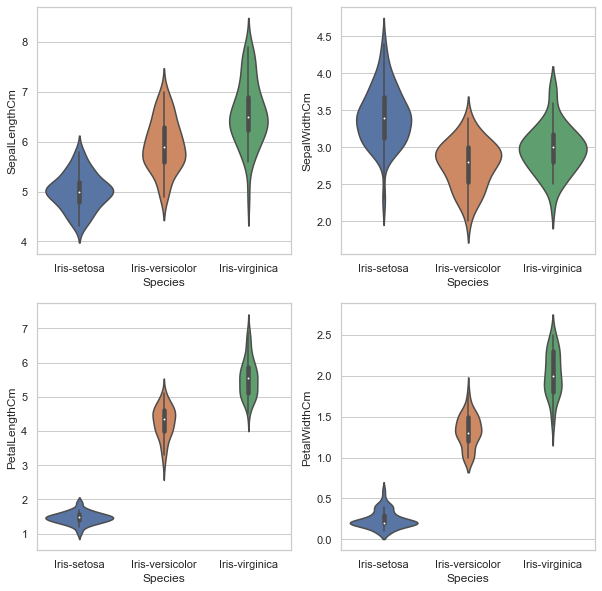

In [9]:
sns.set(style='whitegrid')
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
sns.violinplot(x='Species', y='SepalLengthCm', data=dtf)
plt.subplot(2, 2, 2)
sns.violinplot(x='Species', y='SepalWidthCm', data=dtf)
plt.subplot(2, 2, 3)
sns.violinplot(x='Species', y='PetalLengthCm', data=dtf)
plt.subplot(2, 2, 4)
sns.violinplot(x='Species', y='PetalWidthCm', data=dtf)
plt.show()

## Probability Density Function (PDF) and Cumulative Distribution Function (CDF)
Plotting the Histogram & PDF using Seaborn FacetGrid object

In [10]:
iris_setosa = dtf[dtf['Species'] == 'Iris-setosa']
iris_versicolor = dtf[dtf['Species'] == 'Iris-versicolor']
iris_virginica = dtf[dtf['Species'] == 'Iris-virginica']

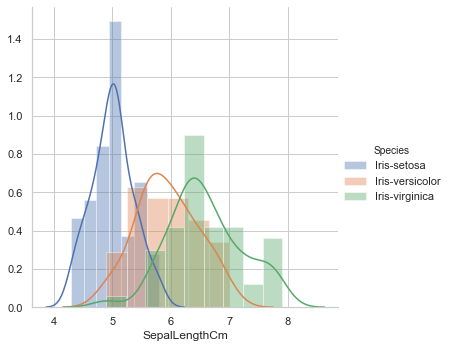

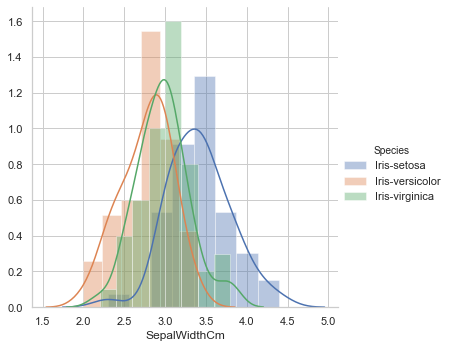

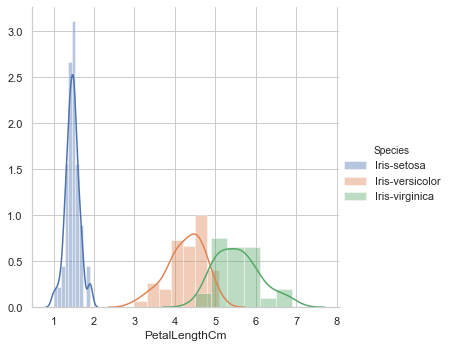

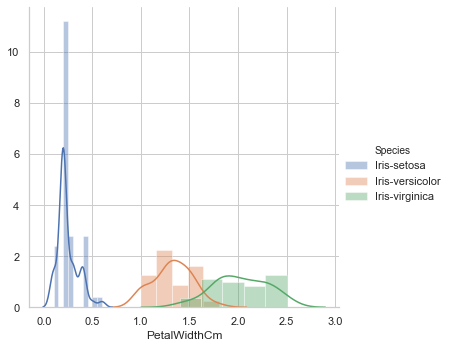

In [11]:
# sepal length
sns.FacetGrid(dtf, hue="Species", height=5)\
    .map(sns.distplot, 'SepalLengthCm').add_legend()

# sepal width
sns.FacetGrid(dtf, hue='Species', height=5)\
    .map(sns.distplot, 'SepalWidthCm').add_legend()

# petal length
sns.FacetGrid(dtf, hue='Species', height=5)\
    .map(sns.distplot, 'PetalLengthCm').add_legend()

# petal width
sns.FacetGrid(dtf, hue='Species', height=5)\
    .map(sns.distplot, 'PetalWidthCm').add_legend()
plt.show()

## Preprocessing

In [12]:
leb = LabelEncoder()
dtf['Species'] = leb.fit_transform(dtf['Species'])
dtf['Species'].value_counts()

2    50
1    50
0    50
Name: Species, dtype: int64

In [13]:
## split data
dtf_train, dtf_test = model_selection.train_test_split(dtf, test_size=0.3)

## print info
print('X_train shape:', dtf_train.drop('Species', axis=1).shape, '| X_test shape:', dtf_test.drop('Species', axis=1).shape)
#print('y_train shape:', round(np.mean(dtf_train['Species']), 2), '| y_test shape:', round(np.mean(dtf_test['Species']), 2))
print(dtf_train.shape[1], "features:", dtf_train.drop("Species",axis=1).columns.to_list())

X_train shape: (105, 4) | X_test shape: (45, 4)
5 features: ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']


In [14]:

## scale X
scalerX = preprocessing.RobustScaler(quantile_range=(25, 75))
X = scalerX.fit_transform(dtf_train.drop('Species', axis=1))

dtf_scaled = pd.DataFrame(X, columns=dtf_train.drop('Species',
                        axis=1).columns, index=dtf_train.index )

## scale Y
scalerY = preprocessing.RobustScaler(quantile_range=(25,75))
dtf_scaled['Species'] = scalerY.fit_transform(dtf_train['Species'].values.reshape(-1,1))

dtf_scaled.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
99,-0.538462,-1.0,-0.371429,-0.133333,0.0
52,0.461538,0.4,0.057143,0.133333,0.0
83,0.000000,-0.6,-0.114286,-0.066667,0.0
142,0.846154,0.2,0.228571,0.666667,0.5
50,-0.615385,0.6,-0.828571,-0.733333,-0.5


## Feature Selection
Feature selection is the process of selecting a subset of relevant variables to build the machine learning model. It makes the model easier to interpret and reduces overfitting (when the model adapts too much to the training data and performs badly outside the train set).

Text(0.5, 1, 'Pearson Correlation')

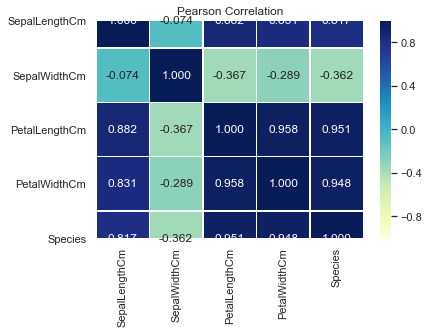

In [15]:
corr_matrix = dtf_train.corr(method='pearson')
sns.heatmap(corr_matrix, vmin=-1., vmax=1., annot=True, fmt='.3f',
           cmap="YlGnBu", cbar=True, linewidths=0.5)
plt.title("Pearson Correlation")

## Bi-Variate analysis

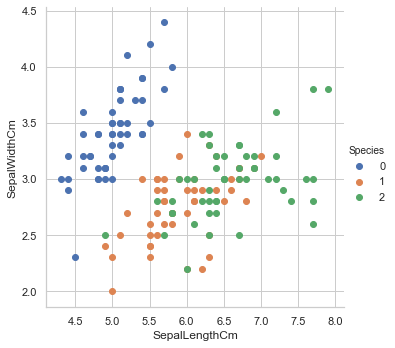

In [16]:
sns.set_style('whitegrid')
sns.FacetGrid(dtf, hue="Species", height=5)\
    .map(plt.scatter, 'SepalLengthCm', 'SepalWidthCm').add_legend()
plt.show()

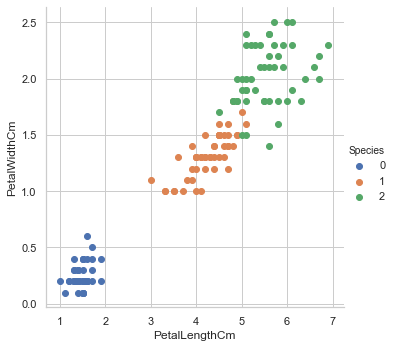

In [17]:
sns.set_style('whitegrid')
sns.FacetGrid(dtf, hue='Species', height=5)\
    .map(plt.scatter, 'PetalLengthCm', 'PetalWidthCm').add_legend()
plt.show()

## Model Design

In [18]:
# Finding the optimum number of clusters for k-means classification
from sklearn.cluster import KMeans

ans = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, random_state=42)
    kmeans.fit(dtf)
    ans.append(kmeans.inertia_)

ans

[780.8244,
 179.12221033868093,
 87.31002785114046,
 66.97905140650855,
 50.419491269841274,
 42.77019525844526,
 35.400319682330554,
 31.255435242696116,
 29.07695663634823,
 26.857226362596215]

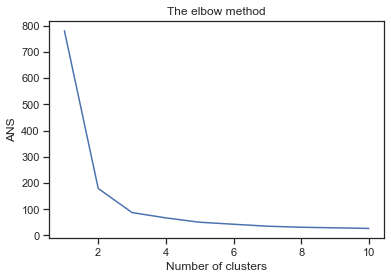

In [19]:
# Plotting the results onto a line graph, allowing us to observe 'The elbow'
sns.set(style='ticks')
plt.plot(range(1, 11), ans)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('ANS')
plt.show()

In [20]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=5)
y_kmeans = kmeans.fit_predict(dtf)
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

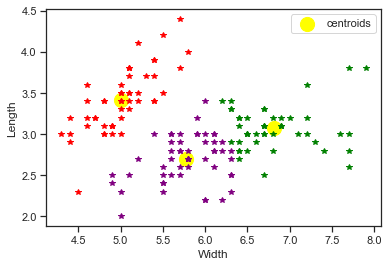

In [21]:
# plt.figure(figsize=(10, 10))
y1 = np.array(dtf['SepalLengthCm'])
y2 = np.array(dtf['SepalWidthCm'])

Y = np.array(list(zip(y1, y2)))
colors = ['green', 'red', 'purple']
markers = ['*', '*', '*']
plt.ylabel('Length')

kmeans = KMeans(n_clusters=3).fit(Y)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='yellow', label='centroids')

for i, l in enumerate(kmeans.labels_):
    plt.plot(y1[i], y2[i], color=colors[l], marker=markers[l])
plt.xlabel('Width')
plt.legend()
plt.show()

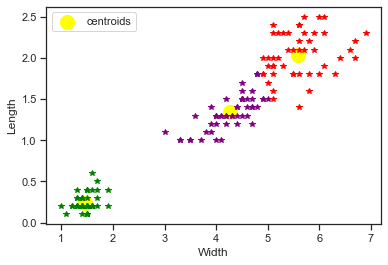

In [22]:
z1 = np.array(dtf['PetalLengthCm'])
z2 = np.array(dtf['PetalWidthCm'])

Z = np.array(list(zip(z1, z2))) 
color = ['green', 'red', 'purple']
markers = ['*', '*', '*']
plt.ylabel('Length')

kmeans = KMeans(n_clusters=3).fit(Z)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='yellow', label='centroids')

for i, l in enumerate(kmeans.labels_):
    plt.plot(z1[i], z2[i], color=colors[l], marker=markers[l])
plt.xlabel('Width')
plt.legend()
plt.show()